In [46]:
import pandas as pd

In [47]:
df = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\Hanun\AppData\Local\Temp\ipykernel_9488\1028708547.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


Data Understanding

In [48]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.shape

(466285, 75)

In [50]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

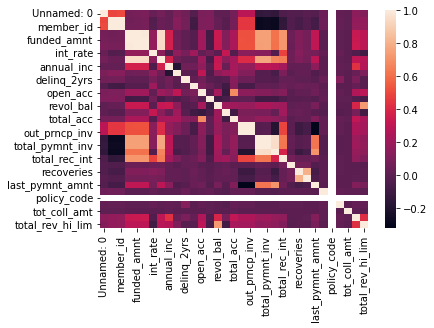

In [96]:
import seaborn as sns
sns.heatmap(df.corr());

Data Preprocessing

> Handling Missing Value

In [61]:
import missingno as msno

def cekNull(df):
    missing = []
    persen = []

    for i in df.columns:
        missing.append(df[i].isnull().sum())
        persen.append(df[i].isnull().sum()/len(df[i])*100)

    proporsi_hilang = pd.DataFrame({
            'kolom' : df.columns,
            'missing' : missing,
            'persen_missing' : persen
    })
    
    msno.matrix(df)
    
    delete_columns = proporsi_hilang.drop(proporsi_hilang[proporsi_hilang.persen_missing < 50].index)
    #print(delete_columns)
    
    impute_columns = proporsi_hilang.drop(proporsi_hilang[(proporsi_hilang.persen_missing >= 50) | (proporsi_hilang.persen_missing <= 0)].index)
    #print(impute_columns)

    return delete_columns, impute_columns

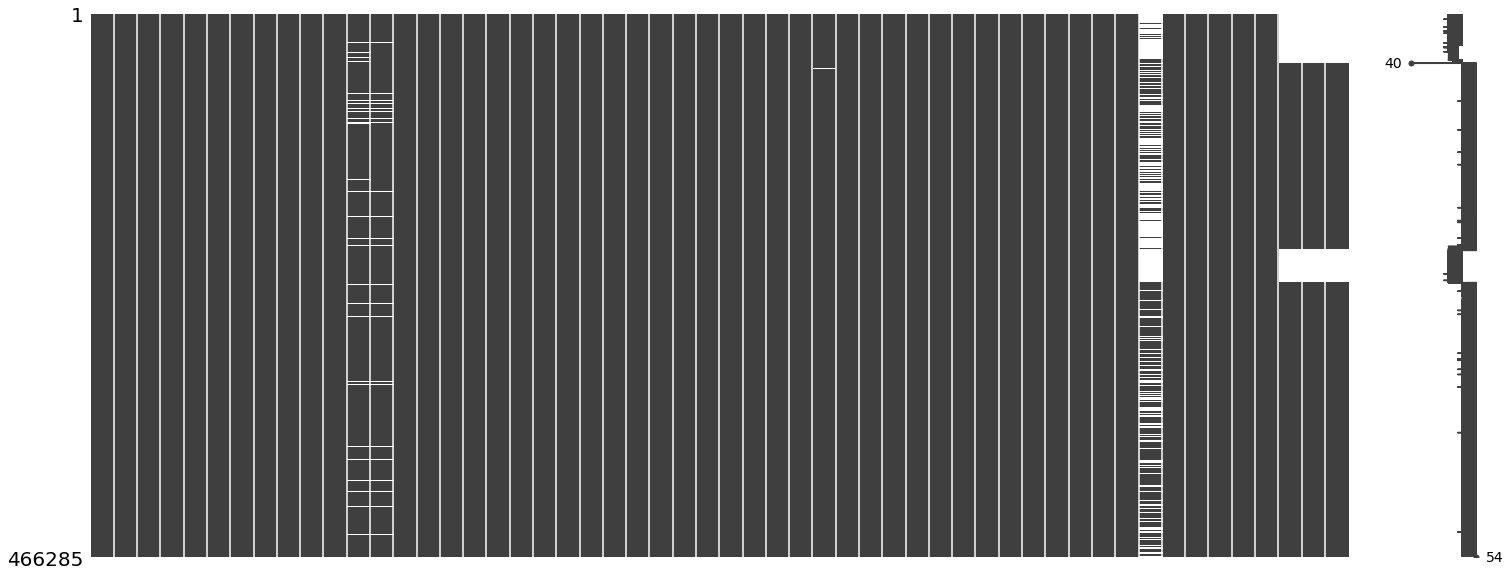

In [62]:
delete_columns, impute_columns = cekNull(df)

In [54]:
delete_columns

,kolom,missing,persen_missing
20,desc,340302,72.981546
29,mths_since_last_delinq,250351,53.690554
30,mths_since_last_record,403647,86.566585
51,mths_since_last_major_derog,367311,78.773926
54,annual_inc_joint,466285,100.000000
55,dti_joint,466285,100.000000
56,verification_status_joint,466285,100.000000
60,open_acc_6m,466285,100.000000
61,open_il_6m,466285,100.000000
62,open_il_12m,466285,100.000000


In [55]:
df[delete_columns['kolom']]

,desc,mths_since_last_delinq,mths_since_last_record,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,open_acc_6m,open_il_6m,open_il_12m,...,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m
0,Borrower added on 12/22/11 > I need to upgra...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Borrower added on 12/21/11 > I plan on combi...,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466281,NaN,NaN,116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466282,Borrower added on 12/06/13 > I am going to c...,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466283,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df = df.drop(delete_columns['kolom'], axis=1)

In [63]:
impute_columns

,kolom,missing,persen_missing
11,emp_title,27588,5.916553
12,emp_length,21008,4.505399
14,annual_inc,4,0.000858
21,title,20,0.004289
25,delinq_2yrs,29,0.006219
26,earliest_cr_line,29,0.006219
27,inq_last_6mths,29,0.006219
28,open_acc,29,0.006219
29,pub_rec,29,0.006219
31,revol_util,340,0.072917


In [64]:
df[impute_columns['kolom']]

,emp_title,emp_length,annual_inc,title,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_pymnt_d,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,NaN,10+ years,24000.0,Computer,0.0,Jan-85,1.0,3.0,0.0,83.7,9.0,Jan-15,NaN,Jan-16,0.0,0.0,NaN,NaN,NaN
1,Ryder,< 1 year,30000.0,bike,0.0,Apr-99,5.0,3.0,0.0,9.4,4.0,Apr-13,NaN,Sep-13,0.0,0.0,NaN,NaN,NaN
2,NaN,10+ years,12252.0,real estate business,0.0,Nov-01,2.0,2.0,0.0,98.5,10.0,Jun-14,NaN,Jan-16,0.0,0.0,NaN,NaN,NaN
3,AIR RESOURCES BOARD,10+ years,49200.0,personel,0.0,Feb-96,1.0,10.0,0.0,21.0,37.0,Jan-15,NaN,Jan-15,0.0,0.0,NaN,NaN,NaN
4,University Medical Group,1 year,80000.0,Personal,0.0,Jan-96,0.0,15.0,0.0,53.9,38.0,Jan-16,Feb-16,Jan-16,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,Financial Advisor,4 years,110000.0,Debt consolidation,0.0,Apr-03,2.0,18.0,0.0,77.6,36.0,Jan-16,Feb-16,Jan-16,0.0,0.0,0.0,294998.0,29900.0
466281,Chief of Interpretation (Park Ranger),10+ years,78000.0,Debt consolidation,0.0,Jun-97,5.0,18.0,1.0,46.3,30.0,Dec-14,NaN,Jan-16,0.0,0.0,0.0,221830.0,39400.0
466282,patrol,7 years,46000.0,Debt consolidation,0.0,Dec-01,2.0,18.0,0.0,51.1,43.0,Jan-16,Feb-16,Dec-15,0.0,0.0,0.0,73598.0,13100.0
466283,Server Engineer Lead,3 years,83000.0,Credit card refinancing,3.0,Feb-03,1.0,21.0,0.0,21.5,27.0,Dec-14,NaN,Apr-15,0.0,0.0,0.0,591610.0,53100.0


In [68]:
df_obj = df[impute_columns['kolom']].select_dtypes(include = 'object')
df_obj.fillna('Tidak Diketahui', inplace=True)
df_obj

,emp_title,emp_length,title,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,Tidak Diketahui,10+ years,Computer,Jan-85,Jan-15,Tidak Diketahui,Jan-16
1,Ryder,< 1 year,bike,Apr-99,Apr-13,Tidak Diketahui,Sep-13
2,Tidak Diketahui,10+ years,real estate business,Nov-01,Jun-14,Tidak Diketahui,Jan-16
3,AIR RESOURCES BOARD,10+ years,personel,Feb-96,Jan-15,Tidak Diketahui,Jan-15
4,University Medical Group,1 year,Personal,Jan-96,Jan-16,Feb-16,Jan-16
...,...,...,...,...,...,...,...
466280,Financial Advisor,4 years,Debt consolidation,Apr-03,Jan-16,Feb-16,Jan-16
466281,Chief of Interpretation (Park Ranger),10+ years,Debt consolidation,Jun-97,Dec-14,Tidak Diketahui,Jan-16
466282,patrol,7 years,Debt consolidation,Dec-01,Jan-16,Feb-16,Dec-15
466283,Server Engineer Lead,3 years,Credit card refinancing,Feb-03,Dec-14,Tidak Diketahui,Apr-15


In [70]:
df[df_obj.columns] = df_obj
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,171.62,Tidak Diketahui,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,119.66,Tidak Diketahui,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,649.91,Tidak Diketahui,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,357.48,Tidak Diketahui,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,432.64,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,17.50,Tidak Diketahui,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,221830.0,39400.0
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,514.34,Feb-16,Dec-15,0.0,1,INDIVIDUAL,0.0,0.0,73598.0,13100.0
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,1500.68,Tidak Diketahui,Apr-15,0.0,1,INDIVIDUAL,0.0,0.0,591610.0,53100.0


In [75]:
df_num = df[impute_columns['kolom']].select_dtypes(include = 'number')
df_num.fillna(0, inplace=True)
df_num

,annual_inc,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,24000.0,0.0,1.0,3.0,0.0,83.7,9.0,0.0,0.0,0.0,0.0,0.0
1,30000.0,0.0,5.0,3.0,0.0,9.4,4.0,0.0,0.0,0.0,0.0,0.0
2,12252.0,0.0,2.0,2.0,0.0,98.5,10.0,0.0,0.0,0.0,0.0,0.0
3,49200.0,0.0,1.0,10.0,0.0,21.0,37.0,0.0,0.0,0.0,0.0,0.0
4,80000.0,0.0,0.0,15.0,0.0,53.9,38.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
466280,110000.0,0.0,2.0,18.0,0.0,77.6,36.0,0.0,0.0,0.0,294998.0,29900.0
466281,78000.0,0.0,5.0,18.0,1.0,46.3,30.0,0.0,0.0,0.0,221830.0,39400.0
466282,46000.0,0.0,2.0,18.0,0.0,51.1,43.0,0.0,0.0,0.0,73598.0,13100.0
466283,83000.0,3.0,1.0,21.0,0.0,21.5,27.0,0.0,0.0,0.0,591610.0,53100.0


In [76]:
df[df_num.columns] = df_num
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,171.62,Tidak Diketahui,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,119.66,Tidak Diketahui,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,649.91,Tidak Diketahui,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,357.48,Tidak Diketahui,Jan-15,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,432.64,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,17.50,Tidak Diketahui,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,221830.0,39400.0
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,514.34,Feb-16,Dec-15,0.0,1,INDIVIDUAL,0.0,0.0,73598.0,13100.0
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,1500.68,Tidak Diketahui,Apr-15,0.0,1,INDIVIDUAL,0.0,0.0,591610.0,53100.0


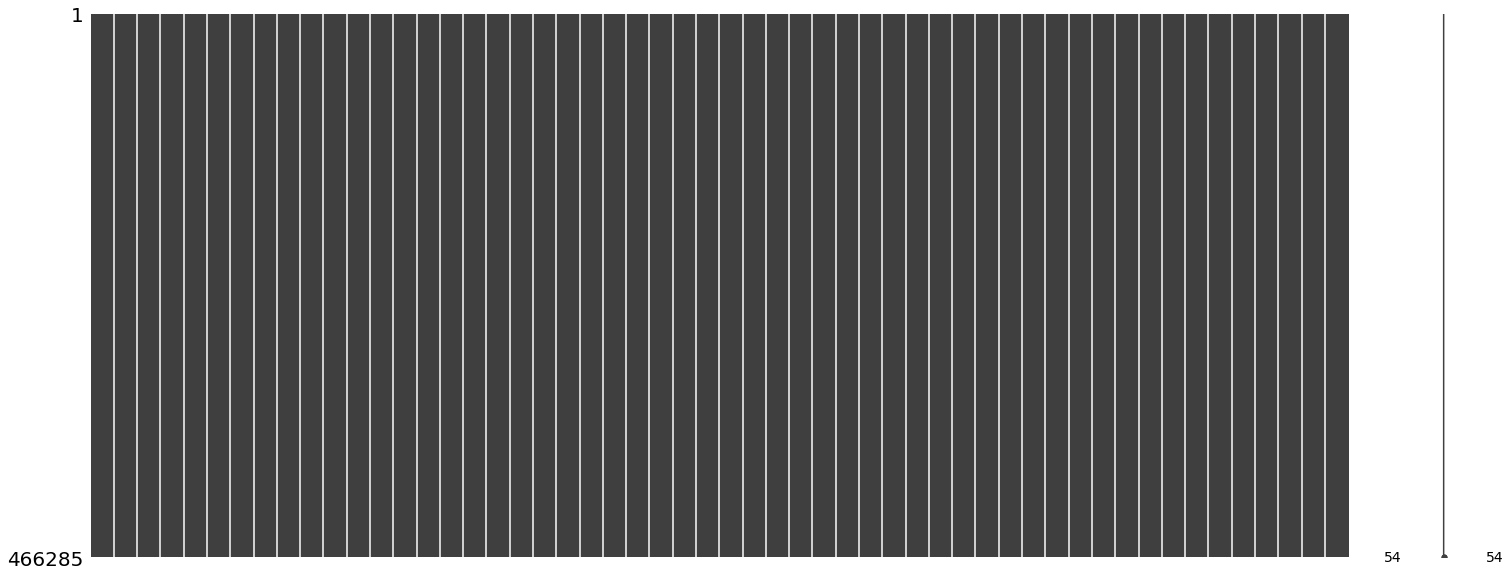

In [78]:
delete_columns, impute_columns = cekNull(df)

> Ordinal Encoder

In [85]:
df_obj = df.select_dtypes(include = 'object')

In [88]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

oe = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=np.nan)
X_obj_transform = oe.fit_transform(df_obj)

X_obj_transform = pd.DataFrame(X_obj_transform)
X_obj_transform.columns = df_obj.columns
X_obj_transform

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,0.0,1.0,6.0,159595.0,1.0,5.0,2.0,19.0,5.0,0.0,...,1.0,8851.0,764.0,3.0,261.0,0.0,40.0,100.0,41.0,0.0
1,1.0,2.0,13.0,131796.0,10.0,5.0,1.0,19.0,0.0,0.0,...,0.0,49817.0,286.0,10.0,51.0,0.0,5.0,100.0,100.0,0.0
2,0.0,2.0,14.0,159595.0,1.0,5.0,0.0,19.0,5.0,0.0,...,11.0,60662.0,544.0,14.0,495.0,0.0,56.0,100.0,41.0,0.0
3,0.0,2.0,10.0,2257.0,1.0,5.0,1.0,19.0,5.0,0.0,...,9.0,60339.0,808.0,4.0,209.0,0.0,40.0,100.0,40.0,0.0
4,1.0,1.0,9.0,165725.0,0.0,5.0,1.0,19.0,1.0,0.0,...,9.0,39313.0,861.0,36.0,272.0,0.0,41.0,33.0,41.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,1.0,2.0,11.0,59755.0,4.0,1.0,1.0,36.0,1.0,0.0,...,2.0,16589.0,686.0,42.0,3.0,1.0,41.0,33.0,41.0,0.0
466281,1.0,3.0,19.0,30516.0,1.0,1.0,2.0,36.0,0.0,0.0,...,2.0,16589.0,351.0,41.0,383.0,0.0,23.0,100.0,41.0,0.0
466282,1.0,3.0,15.0,195140.0,7.0,1.0,2.0,36.0,1.0,0.0,...,2.0,16589.0,429.0,34.0,107.0,0.0,41.0,33.0,24.0,0.0
466283,0.0,0.0,3.0,141073.0,3.0,4.0,2.0,36.0,5.0,0.0,...,1.0,13085.0,804.0,4.0,164.0,1.0,23.0,100.0,6.0,0.0


In [89]:
df_num = df.select_dtypes(include = 'number')

In [94]:
df_concat = pd.concat([X_obj_transform,df_num], axis=1)
df_concat

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0.0,1.0,6.0,159595.0,1.0,5.0,2.0,19.0,5.0,0.0,...,1.0,3.0,0.0,83.7,9.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2.0,13.0,131796.0,10.0,5.0,1.0,19.0,0.0,0.0,...,5.0,3.0,0.0,9.4,4.0,0.0,0.0,0.0,0.0,0.0
2,0.0,2.0,14.0,159595.0,1.0,5.0,0.0,19.0,5.0,0.0,...,2.0,2.0,0.0,98.5,10.0,0.0,0.0,0.0,0.0,0.0
3,0.0,2.0,10.0,2257.0,1.0,5.0,1.0,19.0,5.0,0.0,...,1.0,10.0,0.0,21.0,37.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,9.0,165725.0,0.0,5.0,1.0,19.0,1.0,0.0,...,0.0,15.0,0.0,53.9,38.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,1.0,2.0,11.0,59755.0,4.0,1.0,1.0,36.0,1.0,0.0,...,2.0,18.0,0.0,77.6,36.0,0.0,0.0,0.0,294998.0,29900.0
466281,1.0,3.0,19.0,30516.0,1.0,1.0,2.0,36.0,0.0,0.0,...,5.0,18.0,1.0,46.3,30.0,0.0,0.0,0.0,221830.0,39400.0
466282,1.0,3.0,15.0,195140.0,7.0,1.0,2.0,36.0,1.0,0.0,...,2.0,18.0,0.0,51.1,43.0,0.0,0.0,0.0,73598.0,13100.0
466283,0.0,0.0,3.0,141073.0,3.0,4.0,2.0,36.0,5.0,0.0,...,1.0,21.0,0.0,21.5,27.0,0.0,0.0,0.0,591610.0,53100.0


> Scaler

In [95]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
df_transform = minmax_scaler.fit_transform(df_concat)

df_transform = pd.DataFrame(df_transform)
df_transform.columns = df_concat.columns
df_transform

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0.0,0.166667,0.176471,0.776712,0.090909,1.0,1.0,0.211111,0.625,0.0,...,0.030303,0.035714,0.000000,0.093803,0.057692,0.0,0.0,0.0,0.000000,0.00000
1,1.0,0.333333,0.382353,0.641421,0.909091,1.0,0.5,0.211111,0.000,0.0,...,0.151515,0.035714,0.000000,0.010535,0.025641,0.0,0.0,0.0,0.000000,0.00000
2,0.0,0.333333,0.411765,0.776712,0.090909,1.0,0.0,0.211111,0.625,0.0,...,0.060606,0.023810,0.000000,0.110389,0.064103,0.0,0.0,0.0,0.000000,0.00000
3,0.0,0.333333,0.294118,0.010984,0.090909,1.0,0.5,0.211111,0.625,0.0,...,0.030303,0.119048,0.000000,0.023535,0.237179,0.0,0.0,0.0,0.000000,0.00000
4,1.0,0.166667,0.264706,0.806546,0.000000,1.0,0.5,0.211111,0.125,0.0,...,0.000000,0.178571,0.000000,0.060406,0.243590,0.0,0.0,0.0,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,1.0,0.333333,0.323529,0.290814,0.363636,0.2,0.5,0.400000,0.125,0.0,...,0.060606,0.214286,0.000000,0.086966,0.230769,0.0,0.0,0.0,0.036874,0.00299
466281,1.0,0.500000,0.558824,0.148514,0.090909,0.2,1.0,0.400000,0.000,0.0,...,0.151515,0.214286,0.015873,0.051888,0.192308,0.0,0.0,0.0,0.027728,0.00394
466282,1.0,0.500000,0.441176,0.949702,0.636364,0.2,1.0,0.400000,0.125,0.0,...,0.060606,0.214286,0.000000,0.057268,0.275641,0.0,0.0,0.0,0.009200,0.00131
466283,0.0,0.000000,0.088235,0.686570,0.272727,0.8,1.0,0.400000,0.625,0.0,...,0.030303,0.250000,0.000000,0.024095,0.173077,0.0,0.0,0.0,0.073951,0.00531


Make label with clustering

> PCA

In [97]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_transform)

PCA()

Text(0, 0.5, 'cumulative explained variance')

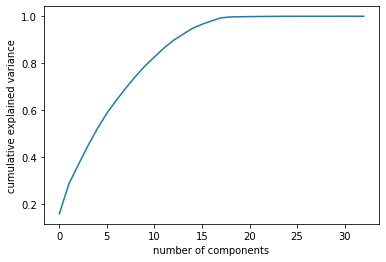

In [99]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [100]:
np.cumsum(pca.explained_variance_ratio_)

array([0.1563109 , 0.28351623, 0.36649654, 0.44613718, 0.52042021,
       0.58588148, 0.64131429, 0.69387862, 0.74264147, 0.78743722,
       0.82643328, 0.86421772, 0.89708574, 0.92300303, 0.9482459 ,
       0.96564079, 0.97970186, 0.99320727, 0.99714189, 0.99787858,
       0.99845064, 0.99897135, 0.99937379, 0.999676  , 0.99980849,
       0.99990941, 0.99994427, 0.99996687, 0.99998297, 0.99999358,
       0.99999881, 1.        , 1.        ])

In [101]:
n_components=2
pca_final = PCA(n_components=n_components)
pca_Data = pca_final.fit_transform(df_transform)

In [109]:
a = {'PC1':pca_final.components_[0], 'PC2':pca_final.components_[1]}
b = pd.DataFrame(a)
b.index = df_transform.columns
b

,PC1,PC2
term,0.650776,3.776812e-01
grade,0.183818,1.561989e-01
sub_grade,0.163731,1.380210e-01
emp_title,0.009469,2.059020e-04
emp_length,-0.023143,8.639926e-03
home_ownership,-0.154342,-9.270722e-02
verification_status,0.347198,4.195218e-01
issue_d,0.034602,-3.589835e-02
loan_status,-0.193809,9.875300e-02
pymnt_plan,0.000017,2.137431e-05


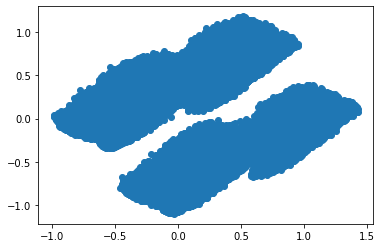

In [102]:
plt.scatter(pca_Data[:,0], pca_Data[:,1])

In [103]:
for i in np.arange(n_components):
    index =  np.argmax(np.absolute(pca_final.get_covariance()[i]))
    max_cov = pca_final.get_covariance()[i][index]
    column = df_transform.columns[index]
    print("Principal Component", i+1, "maximum covariance :", "{:.2f}".format(max_cov), "from column", column)

Principal Component 1 maximum covariance : 0.17 from column term
Principal Component 2 maximum covariance : 0.05 from column grade


> KMeans

In [105]:
from sklearn.cluster import KMeans

sse = {}
n_clust = np.arange(2,11)

for i in n_clust:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(pca_Data)
    sse[i] = kmeans.inertia_

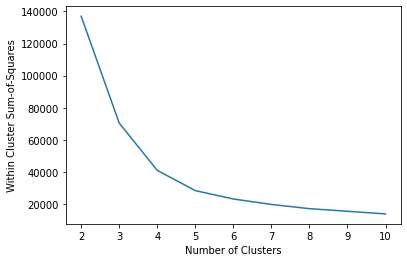

In [106]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum-of-Squares")
plt.show()

In [125]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(pca_Data)

KMeans(n_clusters=4, random_state=0)

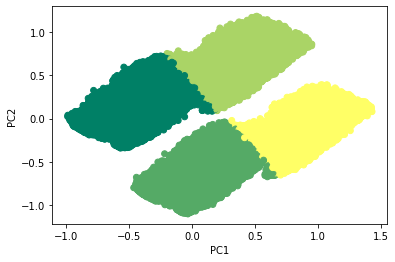

In [112]:
plt.scatter(pca_Data[:,0], pca_Data[:,1],
            c = KMeans(n_clusters = 4).fit_predict(pca_Data),
            cmap = plt.cm.summer)
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show() 

In [121]:
centroids = kmeans.cluster_centers_
for i in np.arange(len(centroids)):
    print("Center of Cluster", i+1, ":", centroids[i])

Center of Cluster 1 : [-0.43899587  0.13318358]
Center of Cluster 2 : [ 0.11549379 -0.66999149]
Center of Cluster 3 : [ 0.95540914 -0.17127164]
Center of Cluster 4 : [0.44281641 0.67338282]


In [129]:
df_transform['label'] = kmeans.labels_

In [130]:
df_transform

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,label
0,0.0,0.166667,0.176471,0.776712,0.090909,1.0,1.0,0.211111,0.625,0.0,...,0.035714,0.000000,0.093803,0.057692,0.0,0.0,0.0,0.000000,0.00000,0
1,1.0,0.333333,0.382353,0.641421,0.909091,1.0,0.5,0.211111,0.000,0.0,...,0.035714,0.000000,0.010535,0.025641,0.0,0.0,0.0,0.000000,0.00000,3
2,0.0,0.333333,0.411765,0.776712,0.090909,1.0,0.0,0.211111,0.625,0.0,...,0.023810,0.000000,0.110389,0.064103,0.0,0.0,0.0,0.000000,0.00000,0
3,0.0,0.333333,0.294118,0.010984,0.090909,1.0,0.5,0.211111,0.625,0.0,...,0.119048,0.000000,0.023535,0.237179,0.0,0.0,0.0,0.000000,0.00000,0
4,1.0,0.166667,0.264706,0.806546,0.000000,1.0,0.5,0.211111,0.125,0.0,...,0.178571,0.000000,0.060406,0.243590,0.0,0.0,0.0,0.000000,0.00000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,1.0,0.333333,0.323529,0.290814,0.363636,0.2,0.5,0.400000,0.125,0.0,...,0.214286,0.000000,0.086966,0.230769,0.0,0.0,0.0,0.036874,0.00299,2
466281,1.0,0.500000,0.558824,0.148514,0.090909,0.2,1.0,0.400000,0.000,0.0,...,0.214286,0.015873,0.051888,0.192308,0.0,0.0,0.0,0.027728,0.00394,3
466282,1.0,0.500000,0.441176,0.949702,0.636364,0.2,1.0,0.400000,0.125,0.0,...,0.214286,0.000000,0.057268,0.275641,0.0,0.0,0.0,0.009200,0.00131,3
466283,0.0,0.000000,0.088235,0.686570,0.272727,0.8,1.0,0.400000,0.625,0.0,...,0.250000,0.000000,0.024095,0.173077,0.0,0.0,0.0,0.073951,0.00531,1


Classification with Random Forest

> Split Data

In [131]:
y = df_transform['label']
x = df_transform.drop(['label'], axis=1)

In [132]:
# Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2
)

print("Jumlah Data Train : {0}".format(len(X_train)))
print("Jumlah Data Test : {0}".format(len(X_test)))

Jumlah Data Train : 373028
Jumlah Data Test : 93257


> Make Modelling

In [133]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

> Make Evaluation Result

In [134]:
y_pred_test = rf.predict(X_test)

In [136]:
from sklearn.metrics import classification_report

print('Result of Testing Datast with optimized parameter')
print(classification_report(y_test, y_pred_test, labels=[3,2,1,0]))

Result of Testing Datast with optimized parameter
              precision    recall  f1-score   support

           3       1.00      0.99      0.99     15128
           2       1.00      0.99      1.00     11375
           1       1.00      1.00      1.00     21385
           0       1.00      1.00      1.00     45369

    accuracy                           1.00     93257
   macro avg       1.00      1.00      1.00     93257
weighted avg       1.00      1.00      1.00     93257

